In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Duomenys paimti iš https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

data = pd.read_csv('marketing_campaign.csv', sep=';')
data['Age'] = (2022 - data['Year_Birth'])

age_groups = []
for age in data['Age'].values:
    if age <= 35:
        age_groups.append('35 and younger')
    elif age >= 36 and age <= 50:
        age_groups.append('36 to 50')
    elif age >= 51 and age <= 64:
       age_groups.append('51 to 64')
    elif age >= 65:
        age_groups.append('65 and older')

data['Age_groups'] = age_groups

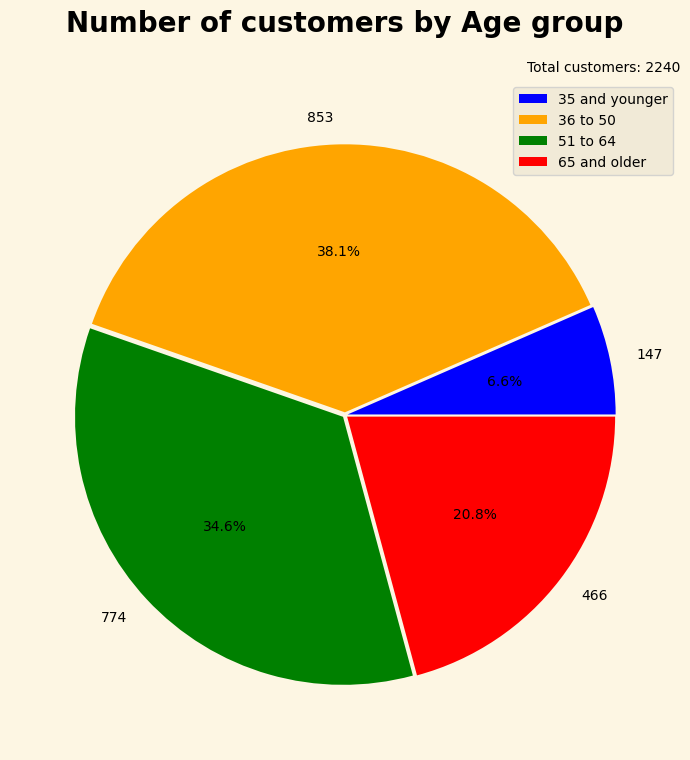

In [14]:
# Number of customers by Age group

g1 = np.count_nonzero(data[(data['Age_groups'] == '35 and younger')]['Income'].values)
g2 = np.count_nonzero(data[(data['Age_groups'] == '36 to 50')]['Income'].values)
g3 = np.count_nonzero(data[(data['Age_groups'] == '51 to 64')]['Income'].values)
g4 = np.count_nonzero(data[(data['Age_groups'] == '65 and older')]['Income'].values)

# Pie chart
fig, ax = plt.subplots(figsize=(7,8))

total = g1+g2+g3+g4
colors = ['blue', 'orange', 'green', 'red']
labels = ['35 and younger', '36 to 50', '51 to 64', '65 and older']
glist = [g1, g2, g3, g4]
explode = (0.01, 0.01, 0.01, 0.01)
ax.pie(glist, explode=explode, labels=glist, colors=colors, autopct='%1.1f%%')
ax.legend(labels, loc=0)
ax.set_title('Total customers: {}'.format(total), fontsize=10, loc='right')

fig.suptitle('Number of customers by Age group', fontsize=20, weight='bold')
fig.tight_layout()
plt.style.use('Solarize_Light2')
plt.show()

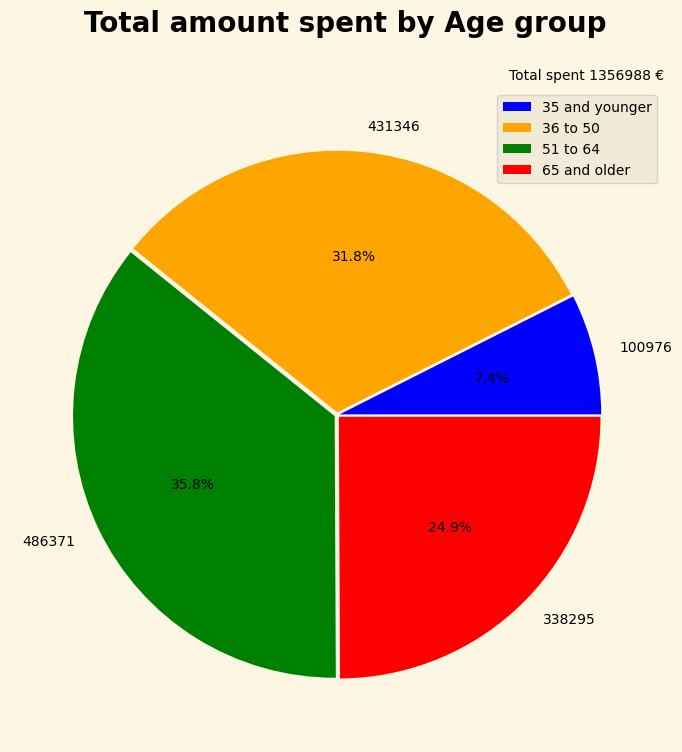

In [15]:
# Total amount spent by Age group

lst = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

g1 = np.sum(data[(data['Age_groups'] == '35 and younger')][lst].values)
g2 = np.sum(data[(data['Age_groups'] == '36 to 50')][lst].values)
g3 = np.sum(data[(data['Age_groups'] == '51 to 64')][lst].values)
g4 = np.sum(data[(data['Age_groups'] == '65 and older')][lst].values)

# Pie chart
fig, ax = plt.subplots(figsize=(7,8))

total = g1+g2+g3+g4
colors = ['blue', 'orange', 'green', 'red']
labels = ['35 and younger', '36 to 50', '51 to 64', '65 and older']
glist = [g1, g2, g3, g4]
explode = (0.01, 0.01, 0.01, 0.01)
ax.pie(glist, explode=explode, labels=glist, colors=colors, autopct='%1.1f%%')
ax.legend(labels, loc=0)
ax.set_title('Total spent {} €'.format(total), fontsize=10, loc='right')

fig.suptitle('Total amount spent by Age group', fontsize=20, weight='bold')
fig.tight_layout()
plt.show()

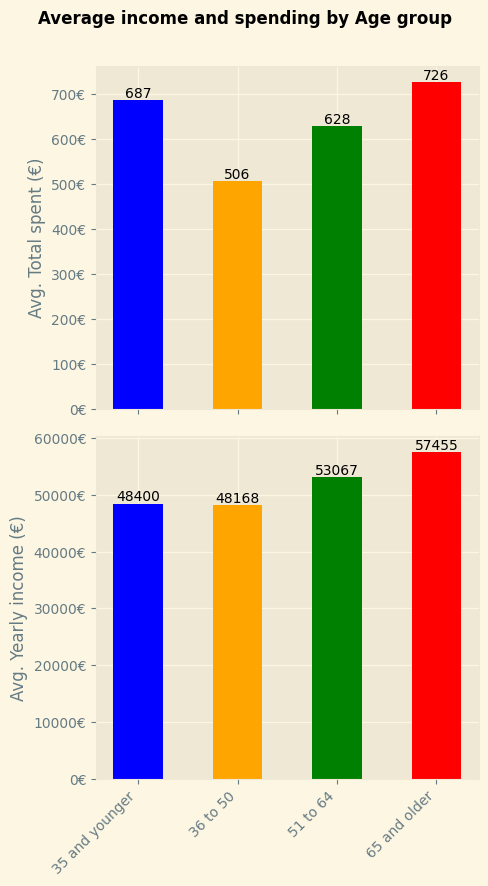

In [16]:
# Average income and spending by Age group

lst = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

i1 = round(np.average(data[(data['Age_groups'] == '35 and younger')]['Income'].values))
i2 = round(np.average(data[(data['Age_groups'] == '36 to 50')]['Income'].values))
i3 = round(np.average(data[(data['Age_groups'] == '51 to 64')]['Income'].values))
i4 = round(np.average(data[(data['Age_groups'] == '65 and older')]['Income'].values))

c1 = np.sum(data[(data['Age_groups'] == '35 and younger')][lst].values)
c2 = np.sum(data[(data['Age_groups'] == '36 to 50')][lst].values)
c3 = np.sum(data[(data['Age_groups'] == '51 to 64')][lst].values)
c4 = np.sum(data[(data['Age_groups'] == '65 and older')][lst].values)

ca1 = np.count_nonzero(data[(data['Age_groups'] == '35 and younger')]['Income'].values)
ca2 = np.count_nonzero(data[(data['Age_groups'] == '36 to 50')]['Income'].values)
ca3 = np.count_nonzero(data[(data['Age_groups'] == '51 to 64')]['Income'].values)
ca4 = np.count_nonzero(data[(data['Age_groups'] == '65 and older')]['Income'].values)

g1 = round(c1/ca1)
g2 = round(c2/ca2)
g3 = round(c3/ca3)
g4 = round(c4/ca4)

# Bar
fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(5,8))

colors = ['blue', 'orange', 'green', 'red']
groups = ['35 and younger', '36 to 50', '51 to 64', '65 and older']
glist = [g1, g2, g3, g4]
ilist = [i1, i2, i3, i4]
x = np.arange(1, len(groups)+1)
w = 0.5

P1 = ax1.bar(x, glist, color=colors, width=w)
ax1.bar_label(P1)
ax1.set_ylabel('Avg. Total spent (€)')
ax1.set_xticks(x)
ax1.set_xticklabels('')
ax1.yaxis.set_major_formatter('{x:1.0f}€')
ax1.yaxis.set_tick_params(which='major', labelleft=True)

P2 = ax2.bar(x, ilist, color=colors, width=w)
ax2.bar_label(P2)
ax2.set_xticks(x)
ax2.set_xticklabels(groups)
ax2.set_ylabel('Avg. Yearly income (€)')
ax2.yaxis.set_major_formatter('{x:1.0f}€')
ax2.yaxis.set_tick_params(which='major', labelleft=True)

fig.suptitle('Average income and spending by Age group', y=1.01, weight='bold')
fig.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
# MySQL

import mysql.connector as cnt
import matplotlib.pyplot as plt
import numpy as np

DB = cnt.connect(
    host='localhost',  # arba 'localhost', arba  '127.0.0.1'
    user='root',
    password='Network1rs',
    port=3317,  # arba kitas
    database='galutine'  # nurodyti nebūtina
)
c = DB.cursor()

sql = """SELECT avg(MntWines), avg(MntMeatProducts), avg(MntGoldProds), avg(MntFishProducts), avg(MntSweetProducts), avg(MntFruits) FROM duomenys
GROUP BY Age_groups
ORDER BY Age_groups;"""
c.execute(sql)
ats = c.fetchall()

g1 = [round(i) for i in ats[0]]
g2 = [round(i) for i in ats[1]]
g3 = [round(i) for i in ats[2]]
g4 = [round(i) for i in ats[3]]

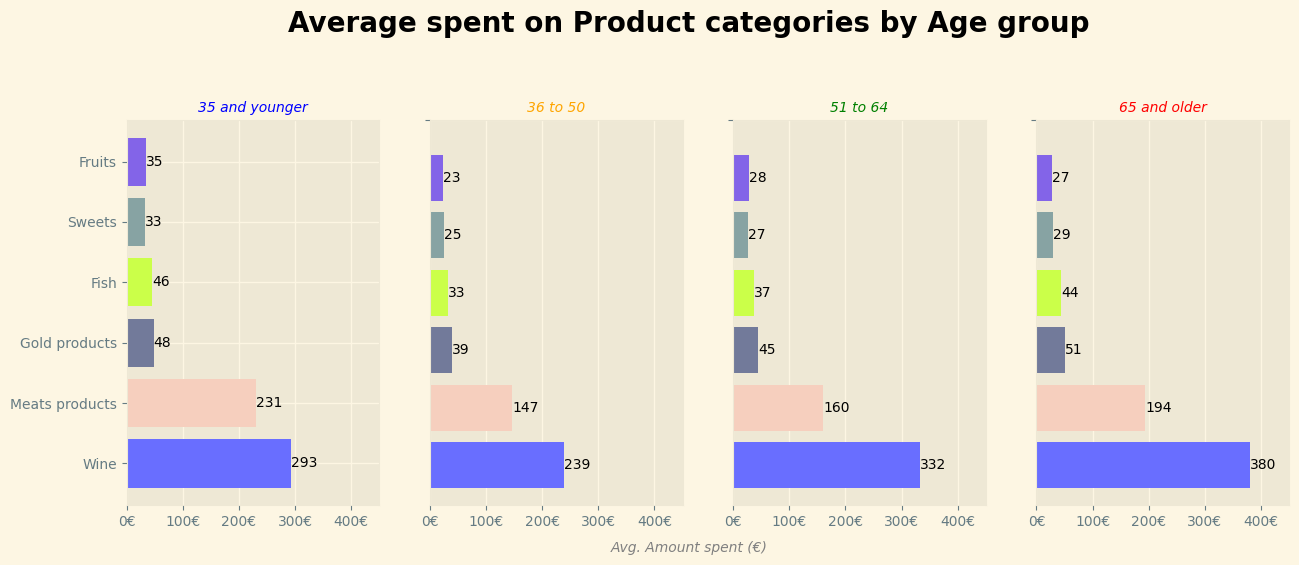

In [18]:
# Average spent on Product categories by Age group

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))

names = ['35 and younger', '36 to 50', '51 to 64', '65 and older']
groups = ['Wine', 'Meats products', 'Gold products', 'Fish', 'Sweets', 'Fruits']
colors = ['#696EFF', '#F6CFBE', '#727A9A', '#CBFF49', '#87A3A3', '#8364E8']

P1 = ax1.barh(groups, g1, color=colors)
ax1.bar_label(P1)
ax1.set_title(names[0], color='blue', style='italic', fontsize=10)
ax1.set_xlim(0, 450)
ax1.xaxis.set_major_formatter('{x:1.0f}€')
ax1.xaxis.set_tick_params(which='major', labelleft=True)

P2 = ax2.barh(groups, g2, color=colors)
ax2.bar_label(P2)
ax2.set_title(names[1], color='orange', style='italic', fontsize=10)
ax2.set_yticks('')
ax2.set_xlim(0, 450)
ax2.xaxis.set_major_formatter('{x:1.0f}€')
ax2.xaxis.set_tick_params(which='major', labelleft=True)

P3 = ax3.barh(groups, g3, color=colors)
ax3.bar_label(P3)
ax3.set_title(names[2], color='green', style='italic', fontsize=10)
ax3.set_yticks('')
ax3.set_xlim(0, 450)
ax3.xaxis.set_major_formatter('{x:1.0f}€')
ax3.xaxis.set_tick_params(which='major', labelleft=True)

P4 = ax4.barh(groups, g4, color=colors)
ax4.bar_label(P4)
ax4.set_title(names[3], color='red', style='italic', fontsize=10)
ax4.set_yticks('')
ax4.set_xlim(0, 450)
ax4.xaxis.set_major_formatter('{x:1.0f}€')
ax4.xaxis.set_tick_params(which='major', labelleft=True)

fig.suptitle('Average spent on Product categories by Age group', fontsize=20, y=1.1, weight='bold')
fig.supxlabel('Avg. Amount spent (€)', color='grey', style='italic', fontsize=10)

plt.show()